In [1]:
!pip install celluloid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

# Turn interactive plotting off
plt.ioff()

#Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from gradient_descent import GradientDescent
from scheduler import *

In [3]:
functions = [
    lambda x: 25 * x ** 2 + 10 *x,
    lambda x: x * sin(x ** 2),
    lambda x: 10 * x ** 2 + 8 * x - 25
]

derivatives = [
    lambda x: 50 * x + 10,
    lambda x: sin(x ** 2) + 2 * x ** 2 * cos(x ** 2),
    lambda x: 20 * x + 8
]

function_names = [
    '25x^2 + 10x',
    'x * sin(x^2)',
    '10x^2 + 8x - 25'
]

initial_point = 0.5467

## Задание 1. Реализуйте градиентный спуск с постоянным шагом. Исследуйте сходимость при различных значениях шага
Для этого задания были реализованы классы GradientDescent, ConstLRScheduler. 

In [5]:
from IPython.core.display import display
for i, (function, derivative, function_name) in enumerate(zip(functions, derivatives, function_names)):
    print(f'Processing function {function_name}')
    for lr in [0.01]:
        gd = GradientDescent(function=function,
                             derivative=derivative,
                             iterations=100000,
                             initial_point=np.array([initial_point]),
                             epsilon=1e-3,
                             scheduler=ConstLRScheduler(lr))
        answer, iterations_count = gd.optimize()
#         print(f'lr={lr}, minimum={round(answer[0], 4)}, iter count={iterations_count}')
        display(gd.plot_trace(title=f'function={function_name}, lr={lr}, minimum={round(answer[0], 4)}, iter count={iterations_count}',
                      with_function=True, 
                      animate=True, 
                      filename=f'ani_{i}_{lr}.gif'))
    print('====================================')

Processing function 25x^2 + 10x


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


200.0


Processing function x * sin(x^2)


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


16.260162601626018


Processing function 10x^2 + 8x - 25


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


80.0


## Задание 2. Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость.
В качестве функции изменения шага была выбрана экспоненциальная функция.

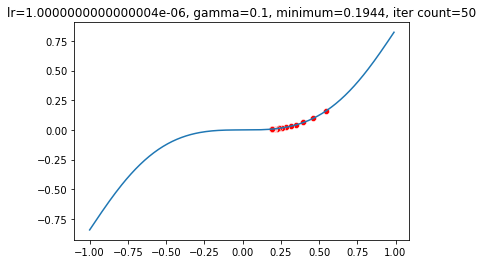

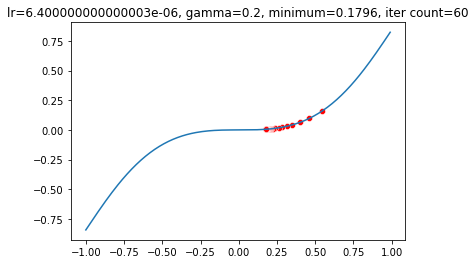

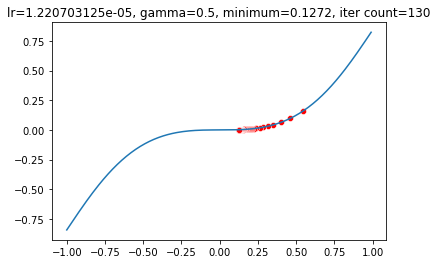

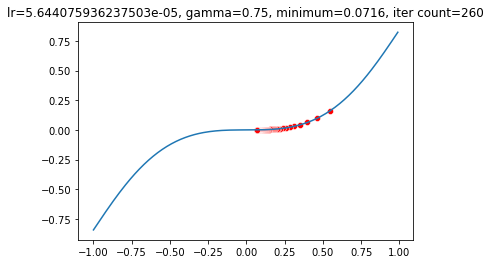

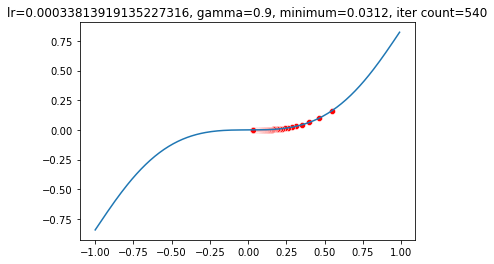

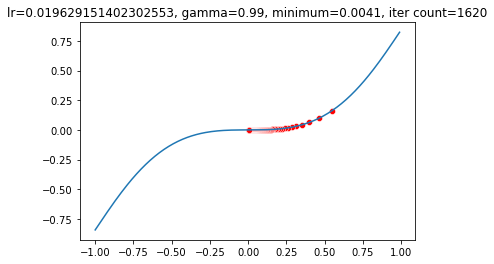

In [6]:
gammas = [0.1, 0.2, 0.5, 0.75, 0.9, 0.99]
lr = 0.1
period = 10

for gamma in gammas:
    scheduler = ExpLRScheduler(lr=lr, gamma=gamma, period=period)
    gd = GradientDescent(function=functions[1], 
                         derivative=derivatives[1], 
                         initial_point=np.array([initial_point]),
                         epsilon=1e-06,
                         iterations=100000,
                         scheduler=scheduler)
    answer, iterations_count = gd.optimize()
    gd.plot_trace(title=f'lr={scheduler.lr}, gamma={gamma}, minimum={round(answer[0], 4)}, iter count={iterations_count}', 
                  with_function = True)